<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Reach-and-Sample-Sizes" data-toc-modified-id="Reach-and-Sample-Sizes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reach and Sample Sizes</a></span><ul class="toc-item"><li><span><a href="#Seasonal-Trends" data-toc-modified-id="Seasonal-Trends-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Seasonal Trends</a></span></li></ul></li></ul></div>

In [42]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
%run "../../zUtilz/LG_load_envz.ipynb"

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


ERROR:root:Cell magic `%%R` not found.


In [74]:
## Load dataset 
dts = pd.read_csv( "%s/LG/1803_KE_CHV Data 2015-March 2018.csv" % DATA_DIR)

## remove the columns we don't need << TODO: are uuid unique
dts.drop( axis=1, inplace=True, labels=[ "supervisor_name", "chw_name", "chw_phone"]) 

## drop test/pre-graduate records/chvs - outliers - 20 < x < 250
dts.drop( dts[ (dts["families_registered"] < 20) | (dts["families_registered"] >350) ].index, inplace=True)

In [75]:
dts.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 23 to 71718
Data columns (total 87 columns):
branch_uuid                                      2044 non-null object
branch_name                                      2044 non-null object
supervisor_uuid                                  2044 non-null object
chw_uuid                                         2044 non-null object
interval_start                                   2044 non-null object
interval_number                                  2044 non-null int64
active_chws_in_period                            2044 non-null int64
families_registered                              2044 non-null int64
pregnancies_registered                           2044 non-null int64
on_time_pnc_visits                               2044 non-null int64
total_healthy_pnc_visits                         2044 non-null int64
all_first_fu_pnc_visits                          2044 non-null int64
edd_no_pnc                                       2044 non-

In [81]:
## 1. set identities and mask  
dnul = zSetRegion( dts)
dts["Year"] = pd.to_datetime(dts["interval_start"], dayfirst=True, errors='coerce').dt.year
dts["Month"] = pd.to_datetime(dts["interval_start"], dayfirst=False, errors='coerce') .dt.month 


## 2. computed fields 
dts["total_assess_child"] = dts["assess_u1"]+dts["assess_u5"]
dts["total_assessments"]= dts["assess_any"]+dts["total_assess_child"]
dts["total_treat_child"] = dts["treatments_u1"]+dts["treatments_u5"]

dts["total_malaria_child"] = dts["malaria_u1"]+dts["malaria_u5"]
dts["total_pneumonia_child"] = dts["pneumonia_u1"]+dts["pneumonia_u5"]
dts["total_diarrhea_child"] = dts["diarrhea_u1"]+dts["diarrhea_u5"]
dts["malaria_all_ages_pos_mrdt_treated"] = dts["malaria_u5_mrtd_pos_treated"]+dts["malaria_o5_mrtd_pos_treated"]

#dts.sample( 7) 

# Introduction

# Reach and Sample Sizes

In [83]:
pd.pivot_table( dts, #[ dts["Year"]!=2018], #margins=True,
               index=["branch_name"], columns=["Year"],
               values=["supervisor_uuid", "chw_uuid", "families_registered", "total_assessments",  "total_treat_child"], 
               aggfunc={ "supervisor_uuid": zCountUnique, 
                        "chw_uuid": zCountUnique, 
                        "families_registered" : {"Total Households": np.sum, "Avg.HHs.Per.CHW" : np.mean} , 
                        "total_assessments" : np.sum,
                        "total_treat_child" : np.sum
                       } ).round()

chw_uuid              families_registered              \
              zCountUnique                  Avg.HHs.Per.CHW               
Year                  2016   2017  2018                2016  2017  2018   
branch_name                                                               
Busia                143.0   11.0  33.0                59.0  27.0  82.0   
Butula                71.0   61.0  57.0                67.0  53.0  64.0   
Funyula                NaN   59.0   1.0                 NaN  60.0  20.0   
Kenyenya               NaN  120.0   NaN                 NaN  61.0   NaN   
Kuresoi                NaN   61.0   NaN                 NaN  49.0   NaN   
Malaba               106.0   23.0   NaN                46.0  29.0   NaN   
Malava                71.0   70.0   NaN                52.0  65.0   NaN   
Nambale                NaN   96.0   NaN                 NaN  81.0   NaN   
Ogembo                 NaN   72.0   NaN                 NaN  86.0   NaN   
Port Victoria         88.0   58.0   NaN                43.0  60.0   NaN   
Shinyalu               NaN   69.0   NaN                 NaN  84.0   NaN   
Suneka               100.0   56.0   NaN                61.0  43.0   NaN   
Thika                  1.0   53.0   1.0                22.0  49.0  50.0   

                                                supervisor_uuid            \
              Total Households                     zCountUnique             
Year                      2016     2017    2018            2016 2017 2018   
branch_name                                                                 
Busia                  14029.0    427.0  2953.0             7.0  4.0  4.0   
Butula                  6680.0   5960.0  4494.0             8.0  7.0  6.0   
Funyula                    NaN   4554.0    20.0             NaN  4.0  1.0   
Kenyenya                   NaN  10626.0     NaN             NaN  7.0  NaN   
Kuresoi                    NaN   4319.0     NaN             NaN  5.0  NaN   
Malaba                  7223.0   1163.0     NaN             7.0  6.0  NaN   
Malava                  5904.0   4975.0     NaN             6.0  6.0  NaN   
Nambale                    NaN   9132.0     NaN             NaN  6.0  NaN   
Ogembo                     NaN   6525.0     NaN             NaN  6.0  NaN   
Port Victoria           5720.0   3798.0     NaN             6.0  5.0  NaN   
Shinyalu                   NaN   6265.0     NaN             NaN  4.0  NaN   
Suneka                  7237.0   3153.0     NaN             6.0  6.0  NaN   
Thika                     22.0   4466.0    50.0             1.0  4.0  1.0   

              total_assessments                total_treat_child          \
                            sum                              sum           
Year                       2016    2017   2018              2016    2017   
branch_name                                                                
Busia                    5741.0   607.0  217.0            2173.0   252.0   
Butula                   3061.0  2803.0  308.0             745.0   726.0   
Funyula                     NaN  1396.0   53.0               NaN   287.0   
Kenyenya                    NaN  4788.0    NaN               NaN   871.0   
Kuresoi                     NaN   992.0    NaN               NaN   280.0   
Malaba                   1985.0  3678.0    NaN             493.0  1076.0   
Malava                   1685.0   803.0    NaN             244.0   170.0   
Nambale                     NaN  5688.0    NaN               NaN   968.0   
Ogembo                      NaN   491.0    NaN               NaN    70.0   
Port Victoria            3020.0  1706.0    NaN             739.0   542.0   
Shinyalu                    NaN  1043.0    NaN               NaN   204.0   
Suneka                   1746.0  2017.0    NaN             388.0   345.0   
Thika                       0.0  2194.0   56.0               0.0   387.0   

                      
                      
Year            2018  
branch_name           
Busia          102.0  
Butula          73.0  
F

In [84]:
#dts.filter( )

## Seasonal Trends 

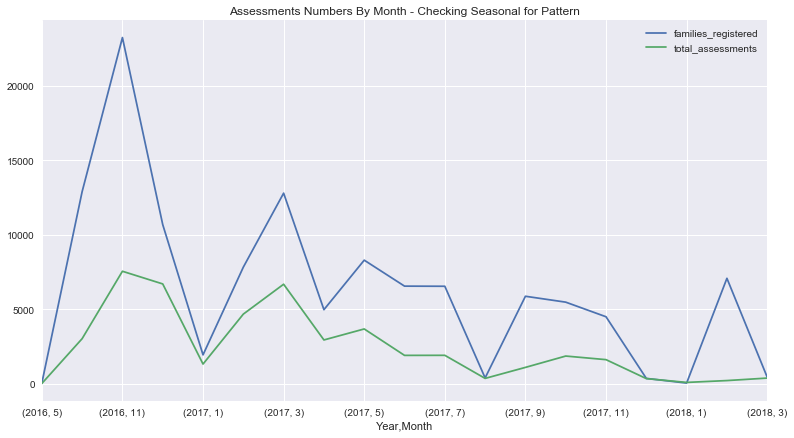

In [93]:
pd.pivot_table( dts, #[ dts["branch_name"]=="Butula"],
               index=["Year", "Month"], 
               values=["total_assessments", "families_registered"], 
               aggfunc=np.sum
              ).round( 0 ).plot( kind="line", figsize=(13,7), title="Assessments Numbers By Month - Checking Seasonal for Pattern")